In [198]:
import torch
import networkx as nx
from torch.utils.data import Dataset, DataLoader
import numpy as np 
from sklearn.metrics import r2_score 
from matplotlib import pyplot as plt

import sys 
sys.path.append('../src/')

#from src.models.GSNN import GSNN
#from src.data.LincsDataset import LincsDataset

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [236]:
# edge id -->               0  1  2  3  4  5  6
edge_index = torch.tensor([[0, 0, 1, 2, 3, 2, 2, 3],
                           [1, 2, 3, 1, 1, 3, 4, 5]], dtype=torch.long)

E = edge_index.size(1)
N = torch.unique(edge_index.view(-1)).size(0)

# only node 0 is input node 
input_node_mask = torch.tensor([True, False, False, False, False, False])
assert input_node_mask.size(0) == N, '`input_node_mask` should have N elements. '

# nodes 4,5 are output nodes 
output_node_mask = torch.tensor([False, False, False, False, True, True])
assert input_node_mask.size(0) == N, '`output_node_mask` should have N elements. '

# shape (B, N, 1)
# NOTE: represents NODE inputs 
x =  torch.tensor([[1., 0., 0., 0.,0.,0.],
                    [-1., 0., 0., 0.,0.,0.]]).unsqueeze(-1)


B = x.size(0)
N = torch.unique(edge_index).view(-1).size(0)

# NOTE: node attrs are now handled by additional input nodes. 

print('# Nodes (N)', N)
print('# Edges (E)', E)

# Nodes (N) 6
# Edges (E) 8


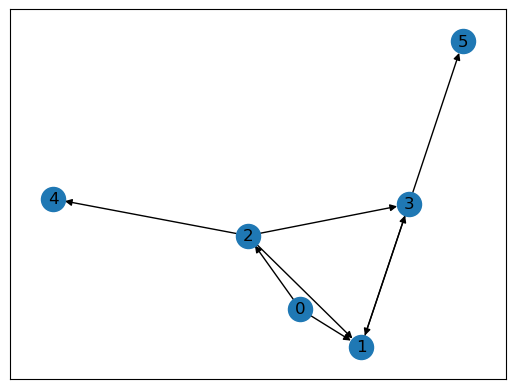

In [237]:
E = (E.detach().cpu().numpy().tolist() for E in edge_index.T)
G = nx.DiGraph(E)

nx.draw_networkx(G)

In [242]:
model = GSNN(edge_index, channels=2, input_node_mask=input_node_mask, output_node_mask=output_node_mask, layers=10)#.to('cuda')

In [243]:
model(x.cpu())

tensor([[ 0.0000,  0.0000,  0.0000,  0.0000, -0.6130, -0.4719],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.3323,  0.5473]],
       grad_fn=<CopySlices>)

In [209]:
optim = torch.optim.Adam(model.parameters())

In [210]:
x = x.to('cuda')

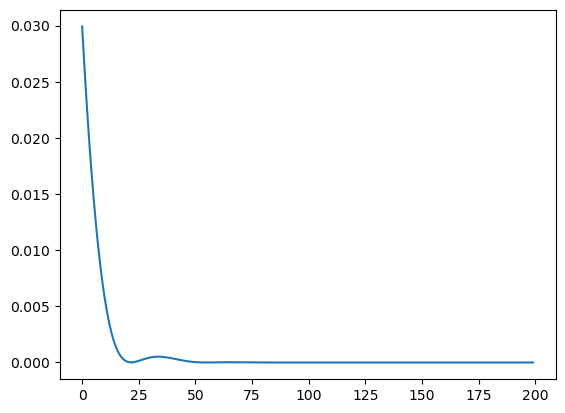

In [211]:
losses = []
for i in range(200): 
    optim.zero_grad()
    out = model(x)
    loss = (out**2).mean() 
    loss.backward()
    optim.step()
    losses.append(loss.item())

plt.figure()
plt.plot(losses)
plt.show()

In [204]:
optim.zero_grad()
out = model(x)
loss = out.mean() 
loss.backward()

In [197]:
model.lin3.values.grad

tensor([-0.1640, -0.2685,  0.0016,  0.0059,  0.0146,  0.0025,  0.0073,  0.0181,
         0.0016,  0.0056, -0.0007,  0.0007])